#### Prerequisite Libraries

In [1]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.3 MB/s eta 0:00:00


#### Code and Output


Results: [0.618241777807421, 0.6859380432499579, 0.710958325799257, 0.7048456960497372, 0.7318538380513041]

Statistics of the Simulated Results:
Mean: 0.6904
Standard Deviation: 0.0389
Minimum: 0.6182
Maximum: 0.7319
Variance: 0.0015


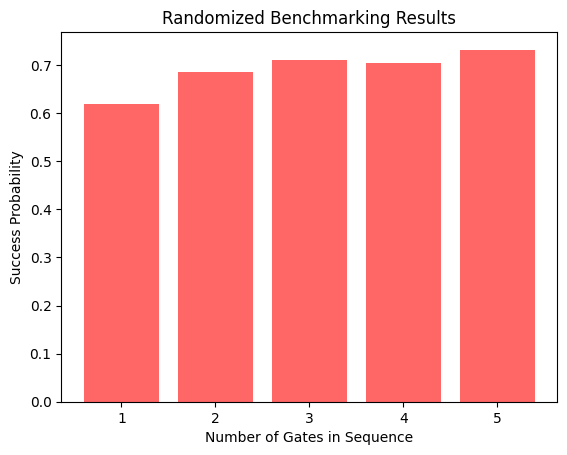

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Generate a random quantum circuit
def generate_random_circuit(num_qubits, depth):
    circuit = QuantumCircuit(num_qubits, num_qubits)
    for _ in range(depth):
        for qubit in range(num_qubits):
            circuit.rx(np.random.uniform(0, 2 * np.pi), qubit)
            circuit.ry(np.random.uniform(0, 2 * np.pi), qubit)
            circuit.rz(np.random.uniform(0, 2 * np.pi), qubit)
        for qubit in range(num_qubits - 1):
            circuit.cz(qubit, qubit + 1)
    return circuit

# Perform randomized benchmarking
def randomized_benchmarking(num_qubits, depths, num_sequences, shots):
    backend = Aer.get_backend('statevector_simulator')
    results = []
    for depth in depths:
        success_counts = 0
        for _ in range(num_sequences):
            # Generate a random circuit and the corresponding inverse circuit
            circuit = generate_random_circuit(num_qubits, depth)
            inverse_circuit = circuit.inverse()

            # Apply the circuit and obtain the final statevector
            circuit_result = backend.run(circuit).result()
            final_statevector = Statevector(circuit_result.get_statevector())

            # Apply the inverse circuit and obtain the final statevector
            inverse_result = backend.run(inverse_circuit).result()
            inverse_statevector = Statevector(inverse_result.get_statevector())

            # Calculate the success rate based on state fidelity
            fidelity = np.abs(np.dot(final_statevector, inverse_statevector.conjugate())) ** 2
            success_counts += shots * (1 - fidelity)

        success_rate = success_counts / (num_sequences * shots)
        results.append(success_rate)
    return results

# Example usage
num_qubits = 2
depths = [1, 2, 3, 4, 5]  # Extend depths for more data points
num_sequences = 100
shots = 1024

# Perform randomized benchmarking
results = randomized_benchmarking(num_qubits, depths, num_sequences, shots)

# Calculate statistics
mean_result = np.mean(results)
std_dev = np.std(results)
min_result = np.min(results)
max_result = np.max(results)
variance = np.var(results)

# Print the statistics
print(f"Results: {results}")
print("\nStatistics of the Simulated Results:")
print(f"Mean: {mean_result:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Minimum: {min_result:.4f}")
print(f"Maximum: {max_result:.4f}")
print(f"Variance: {variance:.4f}")

# Plotting the results
plt.bar(depths, results, color='red', alpha=0.6)
plt.xlabel('Number of Gates in Sequence')
plt.ylabel('Success Probability')
plt.title('Randomized Benchmarking Results')

plt.show()
